In [2]:
import numpy as np
import pandas as pd
import utils

import matplotlib.pyplot as plt 
import seaborn as sns
import seaborn.objects as so

In [3]:
import importlib
importlib.reload(utils)


<module 'utils' from '/home/acercyc/Project/Keio Testing_analysis/src/utils.py'>

In [4]:
fn = utils.path_data / 'ana_three_dot_predicting_individual_beh_profile_cossmilarity/prediction.csv'
df = pd.read_csv(fn)
df['accuracy'] = df['accuracy']=='correct'


In [5]:
df_ = df.copy()
df_ = df_[['group','participant', 'actual control', 'angular bias', 'accuracy', 'auc_pred_accuracy']]
df_ = df_.groupby(['group','participant', 'actual control', 'angular bias']).mean().reset_index()

In [6]:
df_count = df_.value_counts(['group', 'accuracy', 'auc_pred_accuracy'])
# df_count.columns = ['count']
df_count = df_count.reset_index()
df_count.rename(columns={0:'Frequency'}, inplace=True)

# scaling 
df_count['Frequency'] = (df_count['Frequency'])**(1/2)


In [7]:
# g = sns.relplot(data=df_count, x='accuracy', y='auc_pred_accuracy', 
#                 size='Frequency', color='k',
#                 sizes=(3, 800), col='group', height=5)
# g.map(sns.regplot, 'accuracy', 'auc_pred_accuracy', color='red', scatter=False)
# g.set_axis_labels('Groud true accuracy', 'Predicted accuracy')


Text(9.444444444444445, 0.5, 'Predicted accuracy')

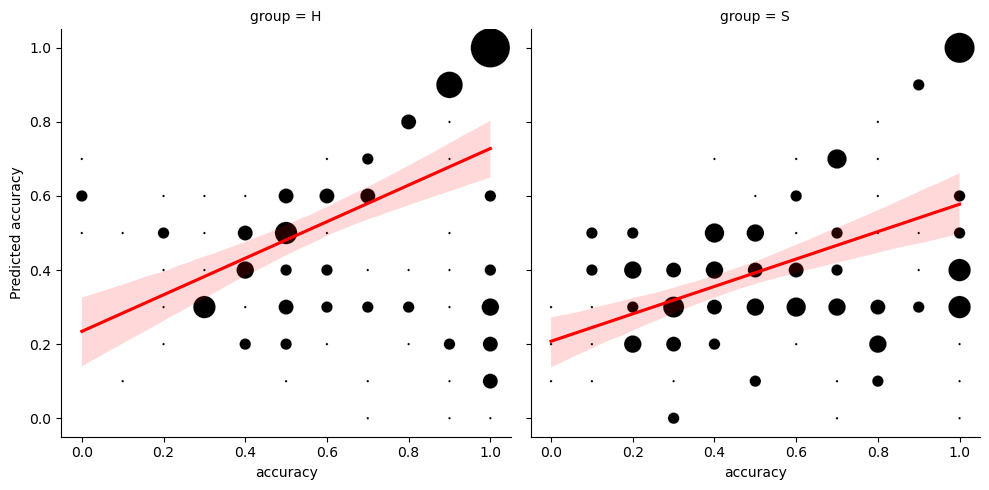

In [8]:
g = sns.relplot(data=df_count, x='accuracy', y='auc_pred_accuracy', 
                size='Frequency', color='k',
                sizes=(3, 800), col='group', height=5, legend=False)
ax = g.figure.get_axes()
sns.regplot(data=df_.query('group=="H"'), x='accuracy', y='auc_pred_accuracy', color='red', scatter=False, ax=ax[0])
sns.regplot(data=df_.query('group=="S"'), x='accuracy', y='auc_pred_accuracy', color='red', scatter=False, ax=ax[1])
ax[0].set_ylabel('Predicted accuracy')

In [8]:
fn = utils.Save.savepath('ana_three_dot_prediction_corr_cosinesimilarity', 'correlation_sns.pdf')
g.savefig(fn)

In [9]:
# from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, facet_grid, theme
# g = (
#     ggplot(df_count, aes(x='accuracy', y='auc_pred_accuracy'))
#     + facet_wrap('group')
#     + geom_point(aes(size='Frequency'))
#     + theme(aspect_ratio=1, figure_size=(10, 8))
# )
# print(g)
# fn = utils.Save.savepath('ana_three_dot_prediction_corr_cosinesimilarity', 'correlation.svg')
# g.save(fn)

### Compute correlation stats

In [10]:
import pingouin as pg
df_.groupby(['group']).apply(lambda x: pg.corr(x['accuracy'].values, x['auc_pred_accuracy'].values))

,,n,r,CI95%,p-val,BF10,power
group,,,,,,,
H,pearson,150,0.466989,"[0.33, 0.58]",1.702185e-09,6.474e+06,0.999986
S,pearson,150,0.438889,"[0.3, 0.56]",1.931733e-08,6.241e+05,0.999917


# Position only

In [11]:
predVar = 'auc_pred_accuracy_h'
df_ = df.copy()
df_ = df_[['group','participant', 'actual control', 'angular bias', 'accuracy', predVar]]
df_ = df_.groupby(['group','participant', 'actual control', 'angular bias']).mean().reset_index()

In [12]:
df_count = df_.value_counts(['group', 'accuracy', predVar])
# df_count.columns = ['count']
df_count = df_count.reset_index()
df_count.rename(columns={0:'Frequency'}, inplace=True)

# scaling 
df_count['Frequency'] = (df_count['Frequency'])**(1/2)

In [13]:
# g = sns.relplot(data=df_count, x='accuracy', y=predVar, 
#                 size='Frequency', color='k',
#                 sizes=(3, 800), col='group', height=5)
# g.map(sns.regplot, 'accuracy', predVar, color='red', scatter=False)
# g.set_axis_labels('Groud true accuracy', 'Predicted accuracy')


Text(9.444444444444445, 0.5, 'Predicted accuracy')

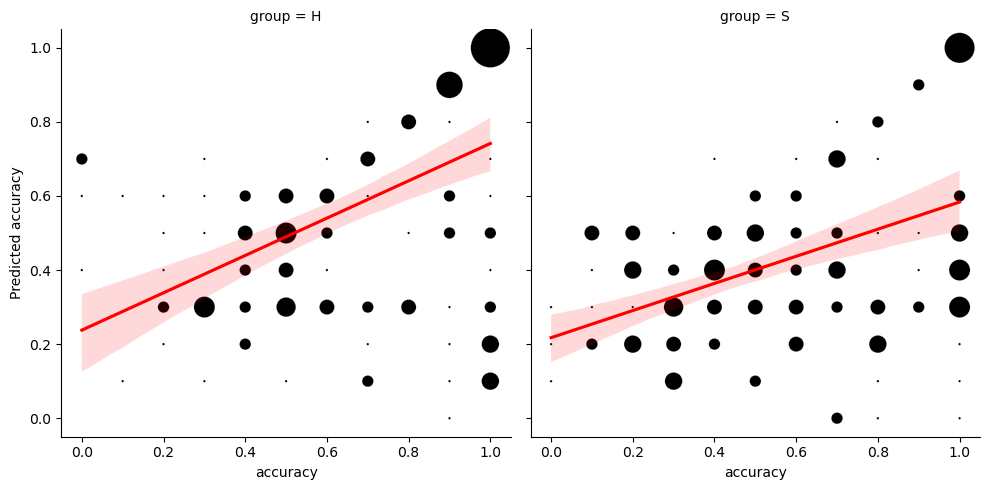

In [14]:
g = sns.relplot(data=df_count, x='accuracy', y=predVar, 
                size='Frequency', color='k',
                sizes=(3, 800), col='group', height=5, legend=False)
ax = g.figure.get_axes()
sns.regplot(data=df_.query('group=="H"'), x='accuracy', y=predVar, color='red', scatter=False, ax=ax[0])
sns.regplot(data=df_.query('group=="S"'), x='accuracy', y=predVar, color='red', scatter=False, ax=ax[1])
ax[0].set_ylabel('Predicted accuracy')

In [15]:
fn = utils.Save.savepath('ana_three_dot_prediction_corr_cosinesimilarity', 'correlation_h_sns.pdf')
g.savefig(fn)

In [16]:
import pingouin as pg
df_.groupby(['group']).apply(lambda x: pg.corr(x['accuracy'].values, x[predVar].values))

,,n,r,CI95%,p-val,BF10,power
group,,,,,,,
H,pearson,150,0.481803,"[0.35, 0.6]",4.317194e-10,2.435e+07,0.999995
S,pearson,150,0.429537,"[0.29, 0.55]",4.134104e-08,3.005e+05,0.999856


<Figure size 640x480 with 0 Axes>

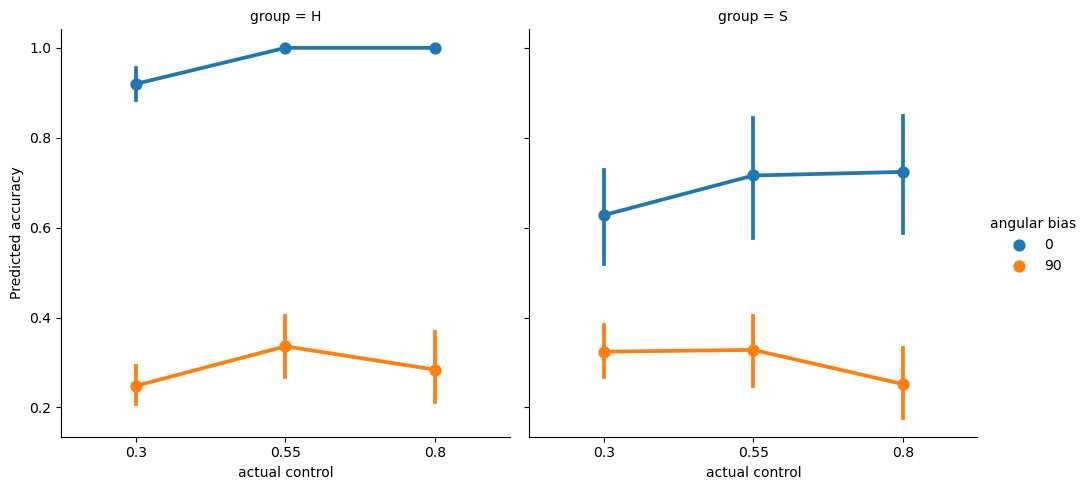

In [17]:
df_ = df.copy()
df_ = df_[['participant', 'actual control', 'angular bias', 'auc_pred_accuracy_target', 'group']]
df_ = df_.groupby(['participant', 'actual control', 'angular bias', 'group']).mean()
df_ = df_.reset_index()

# grid = sns.FacetGrid(col='participant', col_wrap=5, data=df_)
# grid.map_dataframe(sns.pointplot, 
#                    x='actual control', 
#                    y='auc_pred_accuracy_target', 
#                    hue='angular bias')
# grid.add_legend()


plt.figure()
g = sns.catplot(x='actual control', y='auc_pred_accuracy_target', hue='angular bias', data=df_, col='group', kind='point')
g.set_ylabels('Predicted accuracy')


In [ ]:
# Save file
fn = utils.Save.savepath('ana_three_dot_prediction_corr_cosinesimilarity', 'group.pdf')
g.savefig(fn)